In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('default') # set style (colors, background, size, gridlines etc.) # ggplot
plt.rcParams['figure.figsize'] = 10, 3 # set default size of plots
plt.rcParams.update({'font.size': 18})

import scraping_class
logfile = 'log.txt' ## name your log file.
connector = scraping_class.Connector(logfile)

from bs4 import BeautifulSoup
from tqdm import tqdm_notebook as tqdm

In [2]:
#pip install cpi

In [3]:
movies = pd.read_csv('IMDb movies.csv')
actors = pd.read_csv('IMDb names.csv')
ratings = pd.read_csv('IMDb ratings.csv')
role = pd.read_csv('IMDb title_principals.csv')

In [4]:
import requests
session = requests.session()
session.headers['email'] = 'zpx171@alumni.ku.dk'
session.headers['name'] = 'Mathias Ellehauge'
session.headers

{'User-Agent': 'python-requests/2.22.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'email': 'zpx171@alumni.ku.dk', 'name': 'Mathias Ellehauge'}

In [25]:
# IMDb - Remove duplicates and all years before 1990

movies_90 = movies[movies.year >= 1990].drop_duplicates() # (53368, 22)
#movies_90 = movies.drop(movies[movies['year'] < 1990].index)
movies_us = movies[movies.country == 'USA'].drop_duplicates()
movies_us_90 = movies_us[movies_us.year >= 1990].drop_duplicates()

In [29]:
# RT - Remove duplicates 
df_RT = pd.read_csv('RT.csv').drop_duplicates()

# Merge RT and IMDb dataset
df_90 = pd.merge(movies_90,df_RT,how='inner',on='title')
df_90_us = pd.merge(movies_us_90,df_RT,how='inner',on='title')

In [99]:
# Remove $ for worldwide gross (and budget + usa_gross_income):
df_90_income['worldwide_gross_income'] = df_90_income['worlwide_gross_income'].replace({'\$':''}, regex = True)
df_90_income['budget'] = df_90_income['budget'].replace({'\$':''}, regex = True)
df_90_income['usa_gross_income'] = df_90_income['usa_gross_income'].replace({'\$':''}, regex = True)

#df_90_income.info()
#df_90_income.head()
print(df_90_income.shape)

(5766, 25)


In [94]:
# **** Remove NaN (ændre ikke datasettet ... før eller efter samme) ***** 
#df_90_income = df_90_income[df_90_income['worldwide_gross_income'].notna()]
#df_90_income = df_90_income.dropna(subset = ['budget'])
#df_90_income = df_90_income.dropna(subset = ['worlwide_gross_income'])
df_90_income = df_90_income[df_90_income['worldwide_gross_income'].notna()].reset_index(drop=True)
#df_90_income = df_90[df_90['budget'].notna()].reset_index(drop=True)

#df_90_income.info()
df_90_income.head()
#print(df_90_income.shape)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,tomatometer_score,audience_score,worldwide_gross_income
0,tt0035423,Kate & Leopold,Kate & Leopold,2001,2002-04-05,"Comedy, Fantasy, Romance",118,USA,"English, French",James Mangold,...,75298,48000000,47121859,$ 76019048,44.0,330.0,127.0,50%,62%,76019048
1,tt0144142,Committed,Committed,2000,2000-07-14,"Comedy, Drama",98,USA,"English, Spanish",Lisa Krueger,...,3547,3000000,40361,$ 40361,44.0,39.0,42.0,43%,35%,40361
2,tt4126476,After,After,2019,2019-04-12,"Drama, Romance",105,USA,English,Jenny Gage,...,20927,14000000,12138565,$ 69497587,30.0,639.0,68.0,19%,69%,69497587
3,tt4126476,After,After,2019,2019-04-12,"Drama, Romance",105,USA,English,Jenny Gage,...,20927,14000000,12138565,$ 69497587,30.0,639.0,68.0,8%,65%,69497587
4,tt1780762,Aftershock,Aftershock,2012,2014-06-12,"Action, Adventure, Horror",89,"USA, Chile","Spanish, English",Nicolás López,...,10685,2000000,58510,$ 294696,39.0,110.0,155.0,38%,24%,294696


In [95]:
# CPI inflation 
import cpi
#cpi.update()

# Adjust for inflation (#%%timeit)
# Option1:
#df_90_income['adjusted'] = df_90_income.apply(lambda x: cpi.inflate(x.worldwide_gross_income, x.year))


# Optoin 2 (create function)
#def inflate_column(data, column):
#    return data.apply(lambda x: cpi.inflate(x[column], 
#                      x.year), axis=1)

#df_90_income['real_worldwide_gross'] = inflate_column(df_90_income, 'worldwide_gross')


# Option 3: Loops and other stuff .. 
#for i in df_90_income['worldwide_gross_income']:
    #int(i)

#df_90_income['worldwide_gross_income'] = int(df_90_income['worlwide_gross_income'])

#type(df_90_income['year'][1])

#deflated = []
#for i, income  in enumerate(df_90_income['worldwide_gross_income']):
    #deflated.append(cpi.inflate(income, df_90_income['year'][i]))

#cpi.inflate(df_90_income['worldwide_gross_income'][2],df_90_income['year'][2])

#adjust the worldwide gross profits

#for i in range(len(df_90_income)):
#        df_90_income['real_worldwide_gross'] = inflate_column(df_90_income, 'worldwide_gross_income')
    

# see / change types: 
#df_90_income.astype({'worldwide_gross_income' : 'str'}).dtypes
#type(df_90_income.worlwide_gross_income[0])


#Option 4 - change date/time
#df_90_income['datetime_dt'] = pd.to_datetime(df_90_income['date_published'], format = '%Y%m%d')
#df_90_income['month'] = df_90_income.datetime_dt.dt.month
#df_90_income.set_index('datetime_dt')

##df_90_income['date_published'] = df_90_income['date_published'].apply(lambda x:pd.Timestamp(x).value if x else 0)


In [135]:
df_90_income.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,tomatometer_score,audience_score,worldwide_gross_income
0,tt0035423,Kate & Leopold,Kate & Leopold,2001,2002-04-05,"Comedy, Fantasy, Romance",118,USA,"English, French",James Mangold,...,75298,48000000,47121859,$ 76019048,44.0,330.0,127.0,50%,62%,76019048
1,tt0144142,Committed,Committed,2000,2000-07-14,"Comedy, Drama",98,USA,"English, Spanish",Lisa Krueger,...,3547,3000000,40361,$ 40361,44.0,39.0,42.0,43%,35%,40361
2,tt4126476,After,After,2019,2019-04-12,"Drama, Romance",105,USA,English,Jenny Gage,...,20927,14000000,12138565,$ 69497587,30.0,639.0,68.0,19%,69%,69497587
3,tt4126476,After,After,2019,2019-04-12,"Drama, Romance",105,USA,English,Jenny Gage,...,20927,14000000,12138565,$ 69497587,30.0,639.0,68.0,8%,65%,69497587
4,tt1780762,Aftershock,Aftershock,2012,2014-06-12,"Action, Adventure, Horror",89,"USA, Chile","Spanish, English",Nicolás López,...,10685,2000000,58510,$ 294696,39.0,110.0,155.0,38%,24%,294696


In [196]:
# Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

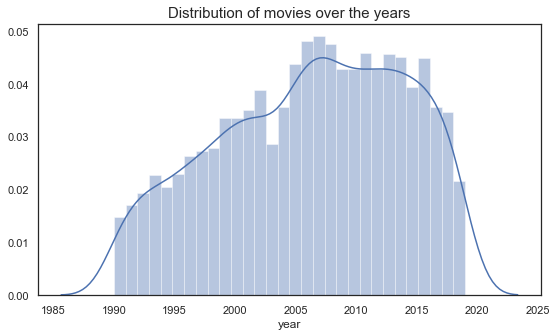

In [199]:
fig, ax = plt.subplots(figsize = (9,5))
sns.distplot(df_90_income.year,bins = 30);
plt.title("Distribution of movies over the years", size = 15);

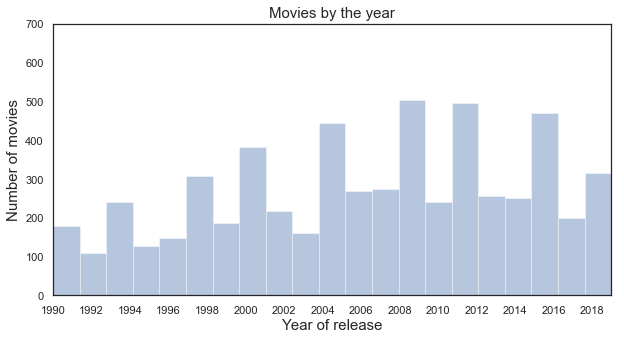

In [198]:
sns.set(style="white")

plt.figure(figsize=(10,5))
plt.title('Movies by the year', size=15)
sns.distplot(df_90_income.year, kde=False)
plt.ylabel('Number of movies', size=15)
plt.xlabel('Year of release',size=15)
plt.axis([1990, 2019, 0, 700])
plt.xticks(np.arange(1990, 2019, step=2))
plt.show()

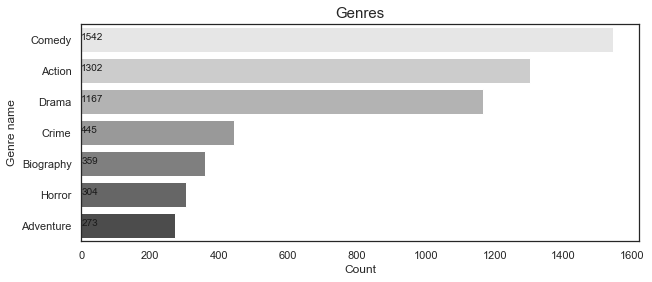

In [181]:
# Overview of the different genres 
df_90_income['first_genre'] = df_90_income['genre'].str.split(',').str[0]

a = plt.cm.binary

plt.figure(figsize=(10,4))
count = df_90_income['first_genre'].value_counts()[:7]
sns.barplot(count.values, count.index, palette=[a(0.1),a(0.2),a(0.3),a(0.4),a(0.5),a(0.6),a(0.7)])
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=10)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre name', fontsize=12)
plt.title("Genres", fontsize=15)
plt.show()

In [193]:
# Overview of movies with highest scores 
top_scored = df_90_income.sort_values(["tomatometer_score","audience_score","metascore"], ascending=False)[
    ["title", "director", "tomatometer_score","audience_score","metascore"]]
top_scored.index = range(0,5766)
top_scored.head(n=10)

,title,director,tomatometer_score,audience_score,metascore
0,L.A. Confidential,Curtis Hanson,99%,94%,90.0
1,How to Train Your Dragon,"Dean DeBlois, Chris Sanders",99%,91%,74.0
2,Finding Nemo,"Andrew Stanton, Lee Unkrich",99%,86%,90.0
3,Selma,Ava DuVernay,99%,86%,88.0
4,Eighth Grade,Bo Burnham,99%,83%,89.0
5,Shaun the Sheep Movie,"Mark Burton, Richard Starzak",99%,81%,81.0
6,Lady Bird,Greta Gerwig,99%,79%,94.0
7,Le Havre,Aki Kaurismäki,99%,75%,82.0
8,Gloria,Sidney Lumet,99%,64%,26.0
9,Gloria,Christian Keller,99%,64%,NaN


In [218]:
test = df_90_income.sort_values(["year"], ascending=False)[
    ["year","tomatometer_score","audience_score","metascore"]]
test.index = range(0,5766)
#test.head(n=10)


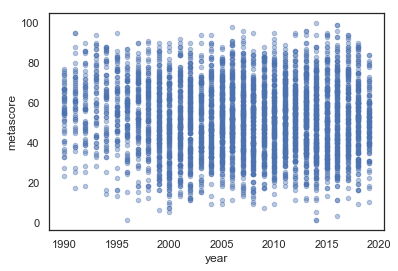

In [219]:
test.plot(kind="scatter",
                      x="year",
                      y="metascore",
                      alpha=0.4)

plt.show()

In [220]:
#fig, ax = plt.subplots(figsize = (9,5))
#sns.distplot(df_90_income.tomatometer_score,bins = 50);
#plt.title("Distribution of metascore among movies", size = 10);


# Error: ould not convert string to float: '50%'
#df_90_income = df_90_income[(df_90_income.tomatometer_score.notnull()) &
#                      (df_90_income.audience_score.notnull())]
#sns.jointplot(x=df_90_income['year'], y=df_90_income['tomatometer_score'],
#              kind="kde").fig.set_size_inches(15,15)

# Works but not pretty 
#plt.figure(figsize=[30,10])
#sns.barplot(x=df_90_income.year, y=df_90_income.metascore, data=df_90_income)

In [221]:
# Ideas:
#1) Look at gender or race in director (men vs women) (balck vs white)